# **Titanic Survival Prediction - 🚢**

In [248]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [249]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **Explorartory Data Analysis**

In [250]:
df.shape

(891, 15)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [252]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [253]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [254]:
df.duplicated().sum()

np.int64(107)

In [255]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [256]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

<Axes: xlabel='pclass', ylabel='survived'>

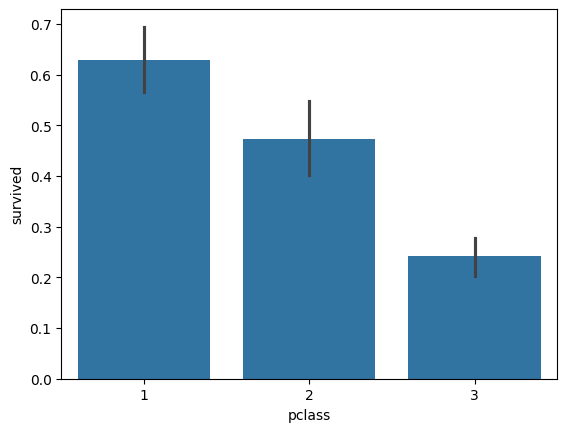

In [257]:
sns.barplot(x='pclass', y='survived', data=df)

In [258]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


<Axes: xlabel='sex', ylabel='survived'>

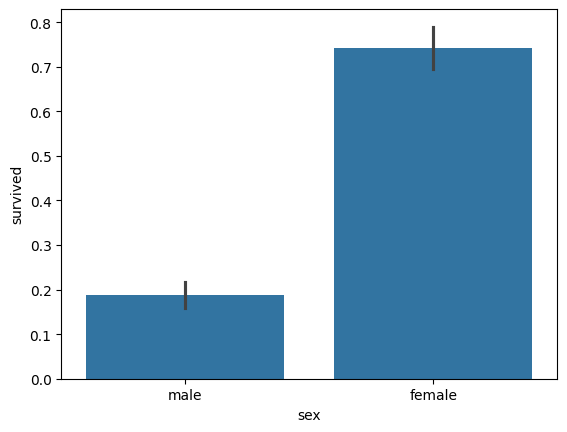

In [259]:
sns.barplot(x='sex', y='survived', data=df)

<Axes: xlabel='alone', ylabel='survived'>

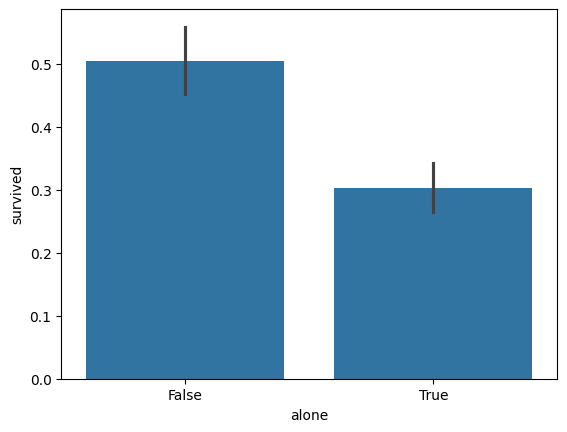

In [260]:
sns.barplot(data=df, x="alone", y="survived")


<Axes: xlabel='sex', ylabel='survived'>

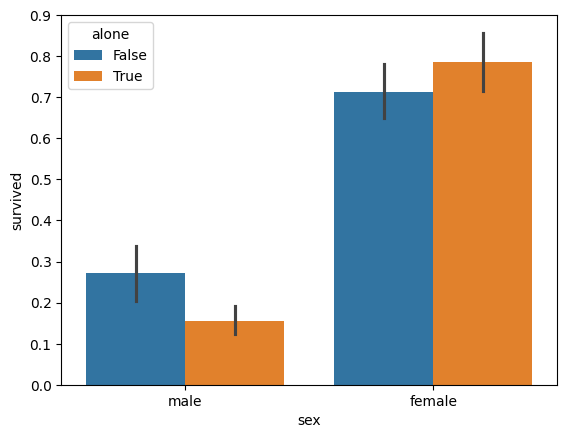

In [261]:
sns.barplot(data=df, x="sex", y="survived", hue="alone")


<Axes: xlabel='fare', ylabel='Count'>

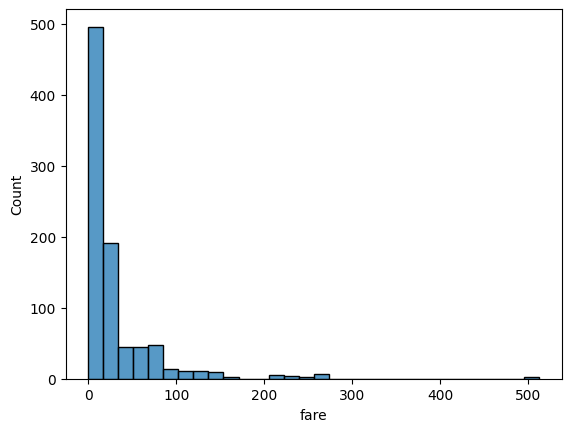

In [262]:
sns.histplot(df["fare"], bins=30)


<Axes: xlabel='survived', ylabel='count'>

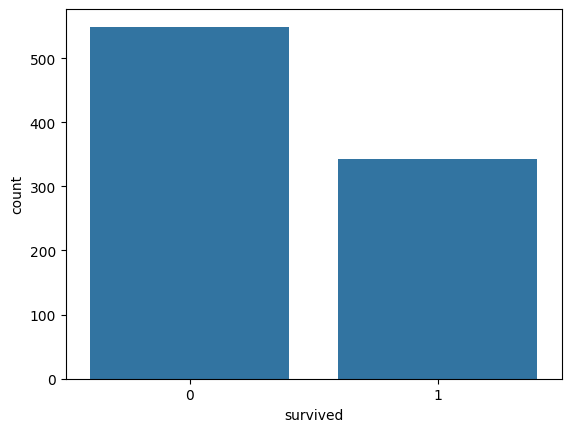

In [263]:
sns.countplot(x='survived', data=df)

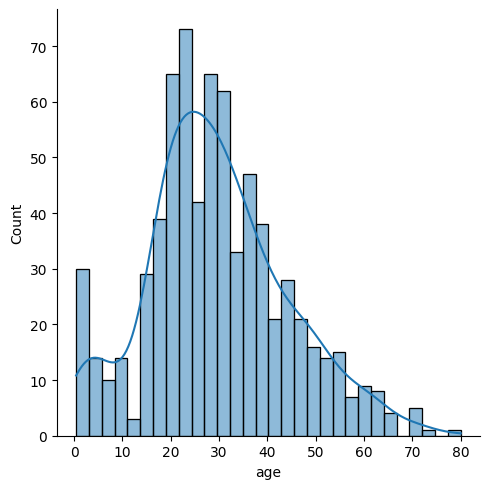

In [264]:
sns.displot(df['age'].dropna(), bins=30, kde=True)

<Axes: xlabel='embarked', ylabel='survived'>

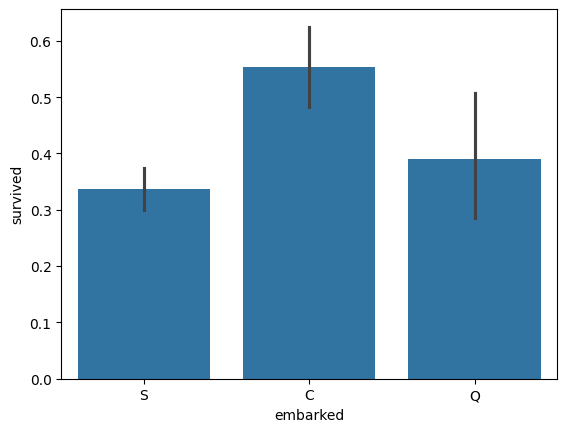

In [265]:
sns.barplot(x='embarked', y='survived', data=df )

In [266]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


<Axes: xlabel='survived', ylabel='fare'>

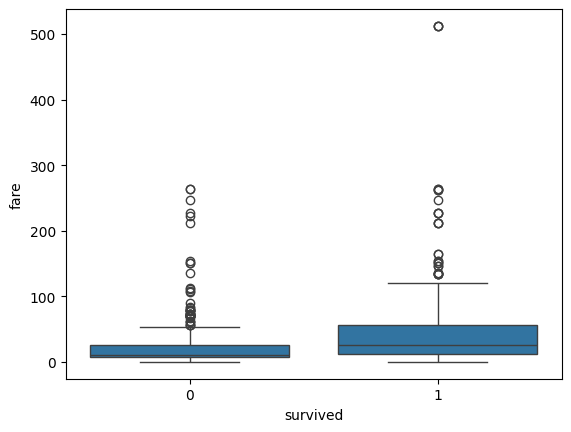

In [267]:
sns.boxplot(data=df, x="survived", y="fare")


<Axes: >

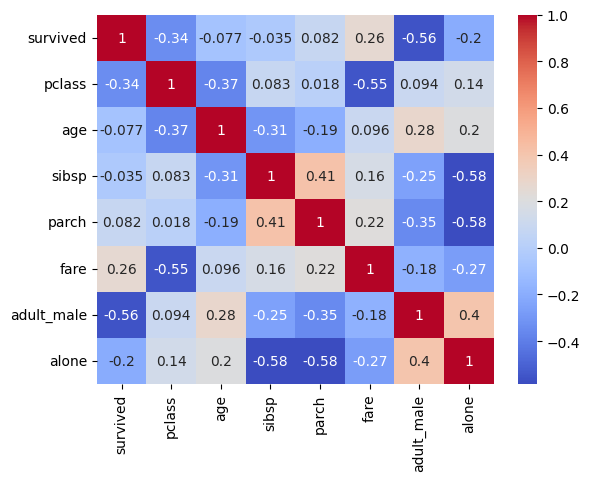

In [268]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# **Data Cleaning**

In [269]:
df_cleaned = df.copy()

In [270]:
df_cleaned.isnull().sum()   

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [271]:
df_cleaned = df_cleaned.drop(columns=["alive", "embark_town", "adult_male", "class","deck", "who"])

In [272]:
df_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [273]:
df_cleaned['age'].fillna(df_cleaned['age'].median(), inplace=True)

In [274]:
df_cleaned.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
alone       0
dtype: int64

In [275]:
df_cleaned.dropna(subset=['embarked'], inplace=True)


In [276]:
df_cleaned.shape

(889, 9)

In [277]:
df_cleaned.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64

In [278]:
df_cleaned.duplicated().sum()

np.int64(116)

In [279]:
df_cleaned.drop_duplicates(inplace=True)

# **Data Preprocessing**

In [280]:
df_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [281]:
df_encoded = pd.get_dummies(df_cleaned, columns=['embarked'], drop_first=True)
df_encoded.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,False,False,True
1,1,1,female,38.0,1,0,71.2833,False,False,False
2,1,3,female,26.0,0,0,7.9250,True,False,True
3,1,1,female,35.0,1,0,53.1000,False,False,True
4,0,3,male,35.0,0,0,8.0500,True,False,True


In [282]:
df_encoded['pclass'] = df_encoded['pclass'].map({1: 'Business', 2: 'Economy', 3: 'Economy Plus'})
df_encoded = pd.get_dummies(df_encoded, columns=['pclass'], drop_first=True)
df_encoded.head()

,survived,sex,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,pclass_Economy,pclass_Economy Plus
0,0,male,22.0,1,0,7.2500,False,False,True,False,True
1,1,female,38.0,1,0,71.2833,False,False,False,False,False
2,1,female,26.0,0,0,7.9250,True,False,True,False,True
3,1,female,35.0,1,0,53.1000,False,False,True,False,False
4,0,male,35.0,0,0,8.0500,True,False,True,False,True


In [283]:
df_encoded['FamilySize'] = df_encoded['sibsp'] + df_encoded['parch'] + 1
df_encoded.head()

,survived,sex,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,pclass_Economy,pclass_Economy Plus,FamilySize
0,0,male,22.0,1,0,7.2500,False,False,True,False,True,2
1,1,female,38.0,1,0,71.2833,False,False,False,False,False,2
2,1,female,26.0,0,0,7.9250,True,False,True,False,True,1
3,1,female,35.0,1,0,53.1000,False,False,True,False,False,2
4,0,male,35.0,0,0,8.0500,True,False,True,False,True,1


In [284]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['sex', 'alone', 'embarked_Q', 'embarked_S', 'pclass_Economy', 'pclass_Economy Plus']
for col in cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded.head()

,survived,sex,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,pclass_Economy,pclass_Economy Plus,FamilySize
0,0,1,22.0,1,0,7.2500,0,0,1,0,1,2
1,1,0,38.0,1,0,71.2833,0,0,0,0,0,2
2,1,0,26.0,0,0,7.9250,1,0,1,0,1,1
3,1,0,35.0,1,0,53.1000,0,0,1,0,0,2
4,0,1,35.0,0,0,8.0500,1,0,1,0,1,1


In [285]:
df_encoded.drop(columns=['sibsp', 'parch'], inplace=True)
df_encoded.head()

,survived,sex,age,fare,alone,embarked_Q,embarked_S,pclass_Economy,pclass_Economy Plus,FamilySize
0,0,1,22.0,7.2500,0,0,1,0,1,2
1,1,0,38.0,71.2833,0,0,0,0,0,2
2,1,0,26.0,7.9250,1,0,1,0,1,1
3,1,0,35.0,53.1000,0,0,1,0,0,2
4,0,1,35.0,8.0500,1,0,1,0,1,1


In [286]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['age', 'fare', 'FamilySize']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()

,survived,sex,age,fare,alone,embarked_Q,embarked_S,pclass_Economy,pclass_Economy Plus,FamilySize
0,0,1,-0.548619,-0.525112,0,0,1,0,1,0.031426
1,1,0,0.617360,0.697085,0,0,0,0,0,0.031426
2,1,0,-0.257124,-0.512228,1,0,1,0,1,-0.625130
3,1,0,0.398739,0.350022,0,0,1,0,0,0.031426
4,0,1,0.398739,-0.509842,1,0,1,0,1,-0.625130


# **Data Split**

In [287]:
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Developement**

**Logistics Regression**

In [289]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [290]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Confusion Matrix:
[[72  6]
 [18 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        78
           1       0.91      0.77      0.83        77

    accuracy                           0.85       155
   macro avg       0.85      0.84      0.84       155
weighted avg       0.85      0.85      0.84       155



**KNN - K Nearest Neighbors**

In [291]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [292]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.79
Confusion Matrix:
[[67 11]
 [21 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        78
           1       0.84      0.73      0.78        77

    accuracy                           0.79       155
   macro avg       0.80      0.79      0.79       155
weighted avg       0.80      0.79      0.79       155



**Naive Bayes Theorm**

In [293]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [294]:
y_pred_gnb = gnb.predict(X_test)


In [295]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred_gnb)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred_gnb)
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(classification_report(y_test, y_pred_gnb))


Accuracy: 0.80
Confusion Matrix:
[[73  5]
 [26 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.82        78
           1       0.91      0.66      0.77        77

    accuracy                           0.80       155
   macro avg       0.82      0.80      0.80       155
weighted avg       0.82      0.80      0.80       155



**Decision Tree**

In [296]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [297]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred_dtc)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred_dtc)
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(classification_report(y_test, y_pred_dtc))

Accuracy: 0.75
Confusion Matrix:
[[64 14]
 [25 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        78
           1       0.79      0.68      0.73        77

    accuracy                           0.75       155
   macro avg       0.75      0.75      0.75       155
weighted avg       0.75      0.75      0.75       155



**SVM - Support Vector Machine**

In [298]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)


In [299]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred_svc)
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(classification_report(y_test, y_pred_svc))

Accuracy: 0.83
Confusion Matrix:
[[76  2]
 [24 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        78
           1       0.96      0.69      0.80        77

    accuracy                           0.83       155
   macro avg       0.86      0.83      0.83       155
weighted avg       0.86      0.83      0.83       155



The best model is Logistics Regression in terms of accuracy with 85

# **K-Fold Cross Validation**

In [300]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y , cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Cross-Validation Accuracy: {scores.mean():.2f}')

Cross-Validation Accuracy Scores: [0.75483871 0.8        0.76129032 0.75324675 0.81168831]
Mean Cross-Validation Accuracy: 0.78
